# Explore here

In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Store the raw data in the ./data/raw folder
data.to_csv("../data/raw/data.csv", index = False)

In [3]:
#Step 2: Exploration and data cleaning
data.shape

#Obtain information about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In conclusion:
There are a total of 41188 rows and 21 columns.
The variables do not contain null values.  
The data has 10 numerical characteristics and 11 categorical characteristics.

In [4]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

# Factorizing (convert categorical values into numerical labels) values:
data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["contact_n"] = pd.factorize(data["contact"])[0]
data["month_n"] = pd.factorize(data["month"])[0]
data["day_of_week_n"] = pd.factorize(data["day_of_week"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]
data["y_n"] = pd.factorize(data["y"])[0]


num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [5]:
#Feature selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

# Dividing the dataset into training and test samples
X = data_scal.drop("y_n", axis = 1)
y = data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

#Store the intermediate data in the ./data/interim folder
#data_scal.to_csv("../data/interim/bank-marketing-campaign-data.csv", index = False)


,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,0.019113,1.0,1.000000,0.980730,1.000000
1,0.023587,1.0,0.333333,0.138291,0.512287
2,0.002643,1.0,0.333333,0.163228,0.512287
3,0.019113,1.0,1.000000,0.980957,1.000000
4,0.069947,1.0,0.937500,0.958059,0.859735


In [6]:
X_test_sel.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,0.075437,1.0,0.333333,0.150759,0.512287
1,0.057950,1.0,0.937500,0.958059,0.859735
2,0.010573,1.0,0.333333,0.153933,0.512287
3,0.072184,1.0,1.000000,0.982317,1.000000
4,0.038430,1.0,1.000000,0.981410,1.000000


In [7]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("/workspaces/Liutciia-logistic-regression/data/processed/bank-marketing-campaign-data_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Liutciia-logistic-regression/data/processed/bank-marketing-campaign-data_test.csv", index=False)

In [8]:
#LOGISTIC REGRESSION
#Step 1: Reading the processed dataset
import pandas as pd

train_data = pd.read_csv("../data/processed/bank-marketing-campaign-data_train.csv")
test_data = pd.read_csv("../data/processed/bank-marketing-campaign-data_test.csv")

train_data.head()


,duration,pdays,emp.var.rate,euribor3m,nr.employed,y_n
0,0.019113,1.0,1.000000,0.980730,1.000000,0.0
1,0.023587,1.0,0.333333,0.138291,0.512287,0.0
2,0.002643,1.0,0.333333,0.163228,0.512287,0.0
3,0.019113,1.0,1.000000,0.980957,1.000000,0.0
4,0.069947,1.0,0.937500,0.958059,0.859735,0.0


In [9]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [10]:
#Step 2: Initialization and training of the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
#Step 3: Model prediction
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [12]:
#Using metrics
#Accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9078659868900218

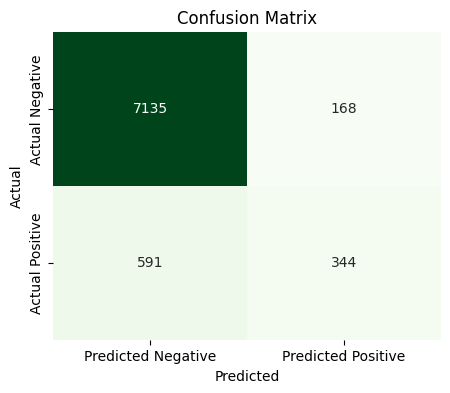

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix
marketing_campaign = confusion_matrix(y_test, y_pred)

# Converting the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(marketing_campaign, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

# Ploting the confusion matrix
plt.figure(figsize=(5, 4)) 
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False, cmap='Greens')  # Adding a color map for better visual distinction
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The interpretation of a confusion matrix is as follows:

True positive (TP): corresponds to the number 344 and are the cases where the model predicted positive (take a deposit) and the actual class is also positive.
True negative (TN): corresponds to the number 7135 and are the cases where the model predicted negative (no take a deposit) and the actual class is also negative.
False positive (FP): corresponds to the number 168 and are the cases in which the model predicted positive, but the actual class is negative.
False negative (FN): corresponds to the number 591 and are the cases where the model predicted negative, but the actual class is positive.

In [17]:
#Precision
result = 344/(344 + 168)
result
#Conclusion: of all the samples predicted as positive, 67% were actually positive

0.671875

In [18]:
#Recall (Sensitivity)
result = 344/(344 + 591)
result
#Conclusion: of all the positive samples, 36% were correctly predicted as positive

0.3679144385026738

In [20]:
#F1 Score
result = 2 * (0.671875 * 0.3679144385026738) / (0.671875 + 0.3679144385026738)
result
#Conclusion: A low F1 score indicates that the model is not performing well in balancing precision and recall.

0.4754664823773324

In [21]:
#Step 4: Optimization of results
#Grid search
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [24]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [25]:
model_grid = LogisticRegression(penalty = "l2", C = 100, solver = "newton-cg")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9092012624423403

As we can see modifying the model parameters leads to the same results 90% (accuracy and grid_accuracy).

In [ ]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))